In [1]:
import pandas as pd

In [2]:
dca_df = pd.read_pickle('../data/dca_df.pkl')
dca_df.rename(columns={'variant target': 'target'}, inplace=True)
gene_var_df = dca_df[dca_df.target=='rho']
gene_var_df

,DesignId,cvDesignEst,cvFit,cv,cvOutlier,baseMean,log2FoldChange,lfcSE,pvalue,padj,...,AA positions,AA ref seq,AA seq change,is_overlap,Grantham score,Grantham category,condition,positive_signif,positive_norm_score,min_max_norm_score
39,9835938,0.000100,0.099409,0.078940,False,360.930787,-0.243942,0.110331,2.395658e-02,6.570824e-02,...,{156},D,Y,False,160.0,radical,adipate,False,0.000000,0.402454
40,9835939,0.000100,0.408599,0.354871,False,7.527771,0.727757,0.594285,5.610792e-02,1.336894e-01,...,{156},D,Y,False,160.0,radical,adipate,False,0.157639,0.521913
41,9835940,0.000100,0.090413,0.070660,False,737.131495,-0.124338,0.092755,1.739946e-01,3.253333e-01,...,{156},D,Y,False,160.0,radical,adipate,False,0.000000,0.417158
124,9836023,0.269811,0.090238,0.269811,True,751.621273,0.655144,0.314742,1.545819e-02,4.497088e-02,...,{61},G,E,False,98.0,moderately conservative,adipate,False,0.141910,0.512986
125,9836024,0.287181,0.096182,0.287181,True,444.829160,0.431878,0.319309,1.090373e-01,2.271610e-01,...,{61},G,E,False,98.0,moderately conservative,adipate,False,0.093549,0.485538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,9843507,0.028851,0.045464,0.042757,False,1132.004364,0.943466,0.062700,4.835290e-52,2.443580e-50,...,{84},S,I,True,142.0,moderately radical,propanediol,False,0.415111,0.749648
7606,9843523,0.000100,0.130937,0.117868,False,91.792277,-0.269412,0.175575,7.627817e-02,1.346158e-01,...,{102},R,L,False,102.0,moderately radical,propanediol,False,0.000000,0.521228
7615,9843532,0.000100,0.061177,0.055540,False,501.013399,0.156449,0.082261,4.933780e-02,9.232387e-02,...,{118},E,D,True,45.0,conservative,propanediol,False,0.068835,0.601430
7623,9843540,0.081546,0.062507,0.066376,False,475.022956,-0.656712,0.096100,1.817580e-12,1.599770e-11,...,{417},K,I,False,102.0,moderately radical,propanediol,False,0.000000,0.448288


In [3]:
signif_gene_var_df = gene_var_df[gene_var_df.positive_signif].copy()

display(len(signif_gene_var_df), signif_gene_var_df.head())

64

,DesignId,cvDesignEst,cvFit,cv,cvOutlier,baseMean,log2FoldChange,lfcSE,pvalue,padj,...,AA positions,AA ref seq,AA seq change,is_overlap,Grantham score,Grantham category,condition,positive_signif,positive_norm_score,min_max_norm_score
7559,9843476,0.555659,0.091013,0.555659,True,691.207591,2.262682,0.703543,7.819900e-05,3.701220e-04,...,{62},F,L,False,22.0,conservative,adipate,True,0.490118,0.710613
124,9836023,0.082949,0.067842,0.072271,False,1257.617072,1.697211,0.094164,7.993190e-74,9.770340e-71,...,{61},G,E,False,98.0,moderately conservative,butanediol,True,0.464406,0.693001
126,9836025,0.193071,0.079993,0.112546,False,510.938246,1.878224,0.148263,5.520950e-38,1.190900e-35,...,{61},G,E,False,98.0,moderately conservative,butanediol,True,0.513936,0.721391
4984,9840894,0.141692,0.075307,0.095368,False,672.758489,1.375406,0.124356,1.294970e-29,1.582890e-27,...,{242},V,G,False,109.0,moderately radical,butanediol,True,0.376350,0.642528
7103,9843015,0.548692,0.279543,0.309368,False,20.674981,2.143980,0.532992,3.265410e-06,2.586240e-05,...,{72},Y,S,False,144.0,moderately radical,butanediol,True,0.586654,0.763073


In [4]:
# need to expand to 1 row per variant AA
df = pd.DataFrame()
for _, v in signif_gene_var_df.iterrows():
    for aa in v['AA positions']:
        df = pd.concat([
            df,
            pd.DataFrame.from_dict({
                'AA position': [aa],
                'log2FoldChange': [v['log2FoldChange']],
                'variant source': [v['variant source']],
            }, orient='columns')
        ])


import matplotlib

# use previous df to get df with each row a unique AA and count variants per AA.
out_df = pd.DataFrame()
for g, gdf in df.groupby(['AA position', 'variant source']):
    out_df = pd.concat([
        out_df,
        pd.DataFrame.from_dict({
            'AA position': [g[0]],
            'log2FoldChange': [gdf['log2FoldChange'].max()],
            'variant count': [len(gdf)],
            'variant source': [g[1]],
            'ngl sphere size': [len(gdf)],
        }, orient='columns')
    ])
out_df.reset_index(inplace=True, drop=True)  # necessary for JSON output

assert(out_df.log2FoldChange.min() > 0)  # not yet dealing with negative values.

norm = matplotlib.colors.Normalize(
    vmin=out_df.log2FoldChange.min(),
    vmax=out_df.log2FoldChange.max()
)

out_df['color'] = out_df.log2FoldChange.apply(lambda x: matplotlib.colors.rgb2hex(matplotlib.cm.YlOrRd(norm(x))))  # enrichment color
# out_df['source color'] = out_df['variant source'].apply(lambda x: {'Pangenome variant': '#FECB52', 'ALE variant': '#19D3F3'}[x])
out_df['residue pos'] = out_df['AA position']  # can do so since using AlphaFold structure that includes initiator methionine.
with open('vars.json', 'w') as outfile:  # for NGL
    outfile.write(out_df.to_json())

out_df

,AA position,log2FoldChange,variant count,variant source,ngl sphere size,color,residue pos
0,61,5.072129,11,ALEdb,11,#fc532b,61
1,62,6.938259,5,ALEdb,5,#800026,62
2,72,5.135582,4,WT alleleome,4,#fc4d2a,72
3,84,3.857485,3,ALEdb,3,#feb651,84
4,84,5.801728,1,WT alleleome,1,#df171d,84
5,85,6.386456,3,WT alleleome,3,#b70026,85
6,86,6.386456,3,WT alleleome,3,#b70026,86
7,88,3.705730,3,ALEdb,3,#fec05b,88
8,101,6.405497,4,ALEdb,4,#b60026,101
9,102,5.245038,10,ALEdb,10,#f74327,102


In [5]:
# need to expand to 1 row per variant AA
aa_var_df = pd.DataFrame()
for _, v in signif_gene_var_df.iterrows():
    aa_pos_l = sorted(list(v['AA positions']))
    # for aa in v['AA positions']:
    for i in range(len(aa_pos_l)):
        aa_pos = aa_pos_l[i]
        aa_var_df = pd.concat([
            aa_var_df,
            pd.DataFrame.from_dict({
                'DesignId': v['DesignId'],
                'AA position': [aa_pos_l[i]],  # expanding detail.
                'norm_score': v['positive_norm_score'],
                'condition': v['condition'],
                'variant source': v['variant source'],
                'AA ref seq': v['AA ref seq'][i] if len(v['AA ref seq']) > 0 else v['AA ref seq'],  # sometimes deletions
                'AA seq change': v['AA seq change'][i] if len(v['AA seq change']) > 0 else v['AA seq change'],  # sometimes deletions
                'EditType': v['EditType'],
            }, orient='columns')
        ])
display(len(aa_var_df), aa_var_df.head())

66

,DesignId,AA position,norm_score,condition,variant source,AA ref seq,AA seq change,EditType
0,9843476,62,0.490118,adipate,ALEdb,F,L,Substitution
0,9836023,61,0.464406,butanediol,ALEdb,G,E,Substitution
0,9836025,61,0.513936,butanediol,ALEdb,G,E,Substitution
0,9840894,242,0.376350,butanediol,WT alleleome,V,G,Substitution
0,9843015,72,0.586654,butanediol,WT alleleome,Y,S,Substitution


In [6]:
aa_var_df.to_pickle('./aa_var_w_sv_df.pkl')
aa_var_df = aa_var_df[aa_var_df['EditType'] != 'Insertion']  # not yet dealing with insertions.
aa_var_df.to_pickle('./aa_var_df.pkl')

In [7]:
# Don't need specific condition since this is implicitly included in DesignId.
uniq_var_df = aa_var_df[['DesignId', 'AA position',
# 'variant source'
]].drop_duplicates().copy()
display(uniq_var_df.head())

,DesignId,AA position
0,9843476,62
0,9836023,61
0,9836025,61
0,9840894,242
0,9843015,72


In [9]:
from biopandas.pdb import PandasPdb

pdf = PandasPdb().read_pdb('../data/structure_files/AF-P0AG30-F1-model_v1.pdb')
adf = pdf.df['ATOM']
cadf = adf[adf["atom_name"]=="CA"]
cadf = cadf.set_index("residue_number")
cadf = cadf[cadf["alt_loc"].isin(['A', ''])]  # removing the 'B' residue alternative locations. I could also find the average between the two positions if necessary to account for both.
cadf.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
residue_number,,,,,,,,,,,,,,,,,,,,
1,ATOM,2,,CA,,MET,,A,,,13.615,-10.762,-22.973,1.0,90.18,,,C,NaN,77
2,ATOM,10,,CA,,ASN,,A,,,11.890,-8.479,-20.338,1.0,91.72,,,C,NaN,85
3,ATOM,18,,CA,,LEU,,A,,,13.805,-6.040,-18.039,1.0,91.27,,,C,NaN,93
4,ATOM,26,,CA,,THR,,A,,,11.227,-6.397,-15.158,1.0,87.76,,,C,NaN,101
5,ATOM,33,,CA,,GLU,,A,,,11.490,-10.241,-15.222,1.0,90.82,,,C,NaN,108


In [10]:
dist_res_df = cadf[['x_coord', 'y_coord', 'z_coord']].copy()
dist_res_df.head()

,x_coord,y_coord,z_coord
residue_number,,,
1,13.615,-10.762,-22.973
2,11.890,-8.479,-20.338
3,13.805,-6.040,-18.039
4,11.227,-6.397,-15.158
5,11.490,-10.241,-15.222


In [11]:
import numpy as np

def get_AA_dist(res1, res2):
    AA_dist = np.nan
    AA_dist = np.sqrt((dist_res_df.at[res2, "x_coord"] - dist_res_df.at[res1, "x_coord"])**2
                      + (dist_res_df.at[res2, "y_coord"] - dist_res_df.at[res1, "y_coord"])**2
                      + (dist_res_df.at[res2, "z_coord"] - dist_res_df.at[res1, "z_coord"])**2)
    return AA_dist

dist_mat = pd.DataFrame(np.nan, columns=dist_res_df.index, index=dist_res_df.index)
for ir in dist_mat.index:
    for ic in dist_mat.columns:
        dist_mat.at[ir, ic] = get_AA_dist(ir, ic)
dist_mat.head()

residue_number,1,2,3,4,5,6,7,8,9,10,...,410,411,412,413,414,415,416,417,418,419
residue_number,,,,,,,,,,,,,,,,,,,,,
1,0.000000,3.889851,6.832111,9.264448,8.053885,8.245279,11.565826,12.873438,12.243800,15.602247,...,50.007416,51.766344,52.978324,54.649377,56.158038,57.627285,59.006596,60.734952,62.627237,63.849961
2,3.889851,0.000000,3.860226,5.621983,5.425689,6.572302,8.994780,10.437378,10.930296,14.597615,...,47.337121,49.203871,50.230235,51.849690,53.538719,54.984906,56.192178,57.992317,59.994970,61.096091
3,6.832111,3.860226,0.000000,3.882486,5.562654,5.250546,6.419967,9.057247,10.046706,13.353672,...,48.034647,49.903212,50.646499,52.326184,54.235738,55.519908,56.551344,58.539349,60.589138,61.458911
4,9.264448,5.621983,3.882486,0.000000,3.853518,5.457189,5.079211,6.627872,8.907315,12.391503,...,44.329136,46.179411,46.850348,48.560013,50.515739,51.746076,52.746634,54.786037,56.830079,57.645672
5,8.053885,5.425689,5.562654,3.853518,0.000000,3.847776,5.450099,5.299808,6.390197,10.241352,...,43.977113,45.593088,46.480188,48.365725,50.084571,51.250863,52.520956,54.545548,56.379845,57.307410


In [12]:
uniq_var_df['residue position'] = uniq_var_df['AA position']  # since using AlphaFold structure, which includes starting Methionine.

In [13]:
# only want to keep variants in clustermap rows
dist_mat = dist_mat[dist_mat.index.isin(uniq_var_df['residue position'])]
dist_mat.head()

residue_number,1,2,3,4,5,6,7,8,9,10,...,410,411,412,413,414,415,416,417,418,419
residue_number,,,,,,,,,,,,,,,,,,,,,
61,28.566482,25.927566,24.080719,24.420087,28.161719,28.740016,27.228937,29.911316,32.651510,35.268121,...,54.559629,57.560052,57.395170,57.777842,60.581437,62.364886,61.961088,63.581480,66.671494,67.145981
62,25.078800,22.550321,20.604952,21.251735,24.960587,25.318795,23.975691,26.845304,29.382965,32.002513,...,54.317701,57.174197,57.141652,57.742218,60.441336,62.156076,61.971790,63.677104,66.629486,67.159597
72,22.246233,18.496340,15.731688,13.575512,16.931213,17.665023,14.446543,15.824417,19.349536,21.181632,...,42.682756,44.944251,44.576231,45.897011,48.685354,49.711709,49.737625,52.057393,54.574005,54.702270
84,25.177514,23.444621,22.749595,23.956099,27.151460,27.958674,27.666773,30.359123,32.515203,35.653730,...,56.474756,59.497103,59.910339,60.246895,62.640247,64.755573,64.748868,66.042110,69.055907,70.007405
85,22.144335,20.248005,19.825751,20.799605,23.892740,25.021412,24.835341,27.286674,29.505076,32.799350,...,53.218841,56.181655,56.709924,57.123747,59.423316,61.542778,61.671563,62.960518,65.899063,66.928204


In [14]:
feats_df = pd.read_pickle('./annot_df.pkl')
feats_df = feats_df[feats_df["feature"]!="Chain"]
feats_df.head()

,feature,start,end,range,color
1,ATP binding domain,156,404,"(156, 249)",#EE854A
2,Rho subunit interface,397,397,"(397, 1)",#6ACC64
3,Rho subunit interface,393,393,"(393, 1)",#6ACC64
4,Rho subunit interface,388,389,"(388, 2)",#6ACC64
5,Rho subunit interface,384,385,"(384, 2)",#6ACC64


In [15]:
# Expand features to have a row for each residue.
feat_per_res_df = pd.DataFrame()
for i, r in feats_df.iterrows():
    feat_per_res_df = pd.concat([feat_per_res_df, pd.DataFrame({'residue position': range(r['start'], r['end']+1), 'feature': r['feature'], 'color': r['color']})])
feat_per_res_df.drop_duplicates(inplace=True)
feat_per_res_df.set_index('residue position', inplace=True, drop=True)
display(len(feat_per_res_df), feat_per_res_df.head())

528

,feature,color
residue position,,
156,ATP binding domain,#EE854A
157,ATP binding domain,#EE854A
158,ATP binding domain,#EE854A
159,ATP binding domain,#EE854A
160,ATP binding domain,#EE854A


In [16]:
feat_color_d_l = []
for g, gdf in feat_per_res_df.groupby('feature'):
    d = {}
    # display(g, gdf)  # debug
    for i in dist_mat.columns:
        if i in gdf.index:
            d[i] = gdf.at[i, 'color']
        else:
            d[i] = '#FFFFFF'
    feat_color_d_l.append(d)

# As many col_colors as there are unique features to plot.
col_colors = []
for i in range(0, len(feat_per_res_df.color.unique())):
    col_colors.append(dist_mat.columns.map(feat_color_d_l[i]))

# col_colors

In [17]:
feat_color_d = {}
df = feat_per_res_df.copy()
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(inplace=True)
for _, r in df.iterrows():
    feat_color_d[r['feature']] = r['color']
feat_color_d

{'ATP binding domain': '#EE854A',
 'Rho subunit interface': '#6ACC64',
 'ATP binding site': '#956CB4',
 'Mg+2 binding site': '#D5BB67',
 'RNA binding site': '#D65F5F',
 'MPD binding site': '#33A02C',
 'SO4 binding site': '#82C6E2',
 'RNA binding domain': '#DC7EC0',
 'DT binding site': '#8C613C',
 'DG binding site': '#C5B0D5',
 'Cu+2 binding site': '#1F78B4',
 'Rho termination factor, N-terminal': '#797979'}

In [18]:
def _get_var_annot(var):
    va = {"Substitution": "Sub", "Deletion": "Del", "Insertion": "Ins"}.get(var['EditType'], '')
    if (va == "Sub") & (len(var['AA seq change']) == 1):
            va = var['AA seq change']
    return va

aa_var_df['var annot'] = aa_var_df.apply(lambda v: _get_var_annot(v), axis=1)

In [19]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import util.const as const


# https://www.exeterlaboratory.com/genomics/in-silico-tools-used-for-the-interpretation-of-novel-variants/
def _get_grantham_category(grantham_score):
    gc = ''
    if grantham_score <= 50:
        gc = 'conservative'
    elif (grantham_score >= 51) & (grantham_score <= 100):
        gc = 'moderately conservative'
    elif (grantham_score >= 101) & (grantham_score <= 150):
        gc = 'moderately radical'
    else:
        gc = 'radical'
    return gc


aa_var_df['Grantham score'] = aa_var_df.apply(lambda r: const.GRANTHAM_SCORE_MAT[(r['AA ref seq'], r['AA seq change'])], axis=1)
aa_var_df['Grantham category'] = aa_var_df.apply(lambda r: _get_grantham_category(r['Grantham score']), axis=1)
aa_var_df.head()

,DesignId,AA position,norm_score,condition,variant source,AA ref seq,AA seq change,EditType,var annot,Grantham score,Grantham category
0,9843476,62,0.490118,adipate,ALEdb,F,L,Substitution,L,22,conservative
0,9836023,61,0.464406,butanediol,ALEdb,G,E,Substitution,E,98,moderately conservative
0,9836025,61,0.513936,butanediol,ALEdb,G,E,Substitution,E,98,moderately conservative
0,9840894,242,0.376350,butanediol,WT alleleome,V,G,Substitution,G,109,moderately radical
0,9843015,72,0.586654,butanediol,WT alleleome,Y,S,Substitution,S,144,moderately radical


In [21]:
sift_df = pd.read_csv('../data/mutfunc/sift.tab.gz', compression='gzip', header=0, sep='\t', quotechar='"')
ddg_df = pd.read_csv('../data/mutfunc/exp.tab.gz', compression='gzip', header=0, sep='\t', quotechar='"')

In [22]:
UNIPROT_GENE_ID = 'P0AG30'
gene_sift_df = sift_df[sift_df['acc'] == UNIPROT_GENE_ID].copy()

def _get_SIFT_score(v):
    sift_score = 0
    gene_pos_sift_df = gene_sift_df[(gene_sift_df['pos'] == v['AA position']) & (gene_sift_df['ref'] == v['AA ref seq']) & (gene_sift_df['alt'] == v['AA seq change'])]
    assert(len(gene_pos_sift_df) == 1)  # checking if the size is one essentially checks if the position and ref match between my data and mutfunc data.
    if len(gene_pos_sift_df) == 1:
        sift_score = gene_pos_sift_df['score'].values[0]  # assuming always of length of 1
    return sift_score


aa_var_df['SIFT score'] = aa_var_df.apply(_get_SIFT_score, axis=1)

# https://www.exeterlaboratory.com/genomics/in-silico-tools-used-for-the-interpretation-of-novel-variants/
aa_var_df['SIFT category'] = aa_var_df.apply(lambda r: 'deleterious' if r['SIFT score'] < 0.05 else 'tolerated', axis=1)

aa_var_df.head()

,DesignId,AA position,norm_score,condition,variant source,AA ref seq,AA seq change,EditType,var annot,Grantham score,Grantham category,SIFT score,SIFT category
0,9843476,62,0.490118,adipate,ALEdb,F,L,Substitution,L,22,conservative,0.023571,deleterious
0,9836023,61,0.464406,butanediol,ALEdb,G,E,Substitution,E,98,moderately conservative,0.005424,deleterious
0,9836025,61,0.513936,butanediol,ALEdb,G,E,Substitution,E,98,moderately conservative,0.005424,deleterious
0,9840894,242,0.376350,butanediol,WT alleleome,V,G,Substitution,G,109,moderately radical,0.000050,deleterious
0,9843015,72,0.586654,butanediol,WT alleleome,Y,S,Substitution,S,144,moderately radical,0.000703,deleterious


In [23]:
gene_ddg_df = ddg_df[ddg_df['uniprot_id'] == UNIPROT_GENE_ID].copy()

def _get_ddg(v):
    ddg = np.nan
    gene_pos_ddg_df = gene_ddg_df[(gene_ddg_df['uniprot_pos'] == v['AA position']) & (gene_ddg_df['aa_wt'] == v['AA ref seq']) & (gene_ddg_df['aa_mt'] == v['AA seq change'])]
    
    # Best we can do here is check if less than or equal to 1 since the available structures may not have all positions.
    # As long as SIFT DFs are of length 1, we can assume that the position and ref match between my data and mutfunc data.
    assert(len(gene_pos_ddg_df) <= 1)
    if len(gene_pos_ddg_df) > 0:
        ddg = gene_pos_ddg_df['ddG'].values[0]  # assuming always of length of 1
    return ddg


aa_var_df['DDG score'] = aa_var_df.apply(_get_ddg, axis=1)

# http://mutfunc.com/help
aa_var_df['DDG category'] = aa_var_df.apply(lambda r: 'destabilizing' if r['DDG score'] > 2 else 'stable', axis=1)

aa_var_df.head()

,DesignId,AA position,norm_score,condition,variant source,AA ref seq,AA seq change,EditType,var annot,Grantham score,Grantham category,SIFT score,SIFT category,DDG score,DDG category
0,9843476,62,0.490118,adipate,ALEdb,F,L,Substitution,L,22,conservative,0.023571,deleterious,0.7858,stable
0,9836023,61,0.464406,butanediol,ALEdb,G,E,Substitution,E,98,moderately conservative,0.005424,deleterious,3.3980,destabilizing
0,9836025,61,0.513936,butanediol,ALEdb,G,E,Substitution,E,98,moderately conservative,0.005424,deleterious,3.3980,destabilizing
0,9840894,242,0.376350,butanediol,WT alleleome,V,G,Substitution,G,109,moderately radical,0.000050,deleterious,3.0830,destabilizing
0,9843015,72,0.586654,butanediol,WT alleleome,Y,S,Substitution,S,144,moderately radical,0.000703,deleterious,5.5188,destabilizing


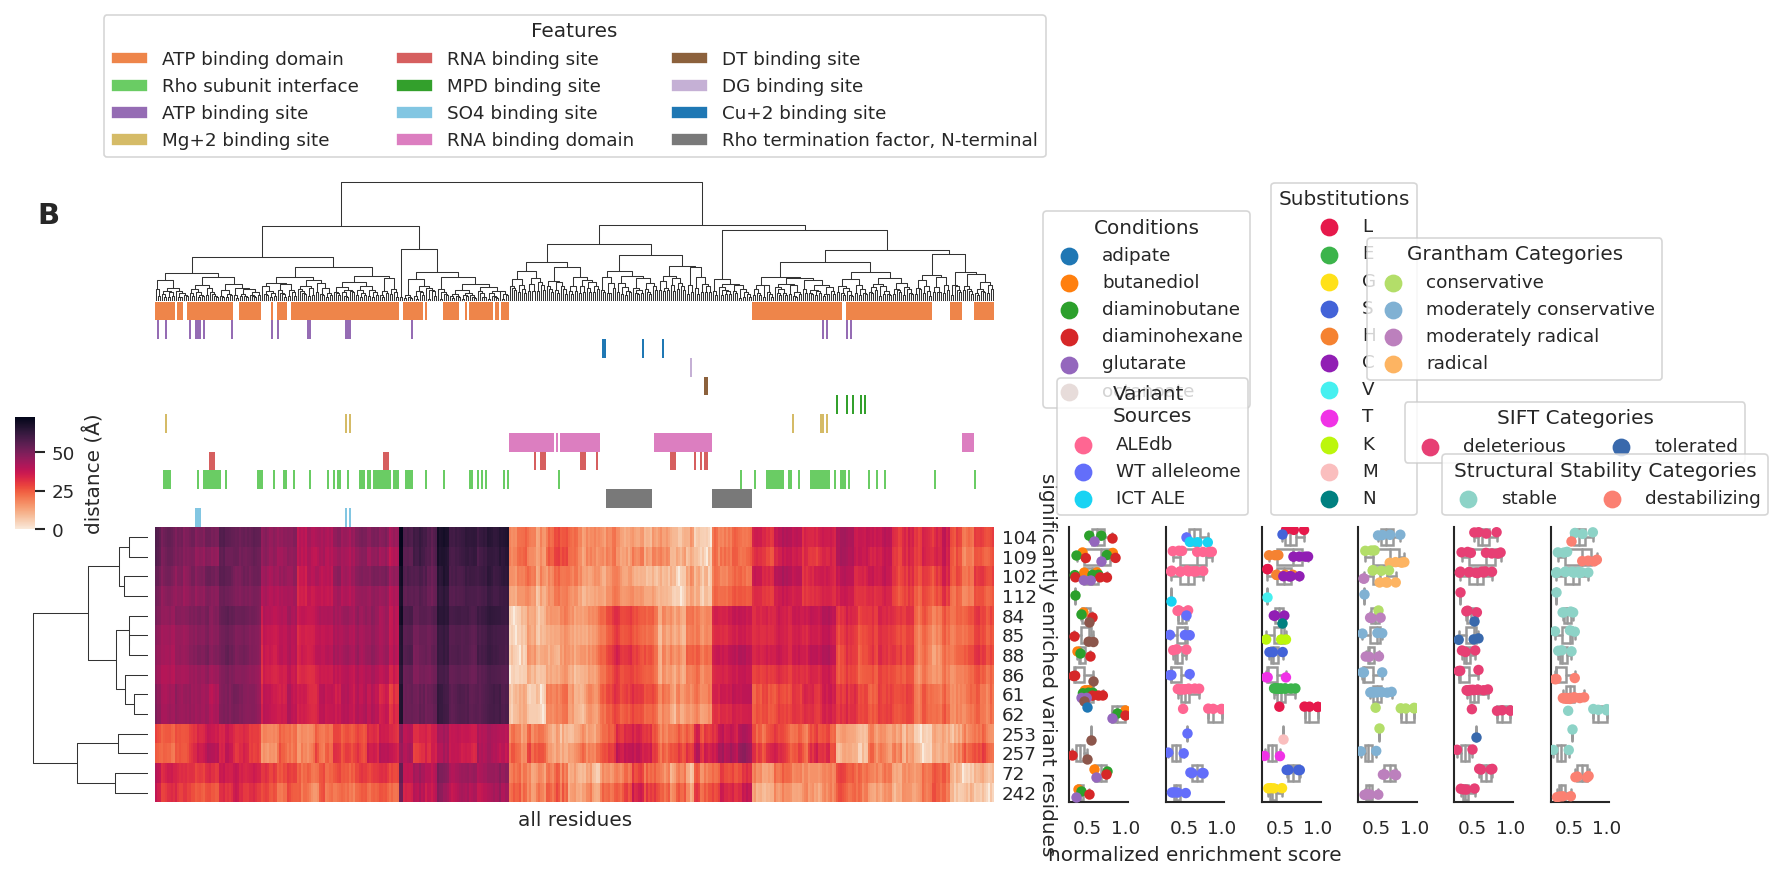

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as mpl

mpl.rcParams["figure.dpi"] = 150
sns.set_context("paper")
sns.set_style("white")

cm = sns.clustermap(
    dist_mat,
    cbar_kws={'label': 'distance (Å)'},
    cbar_pos=(0.13, 0.5, 0.01, 0.15),
    yticklabels=True,
    xticklabels=True,
    cmap="rocket_r",
    col_colors=col_colors,
    figsize=(13, 5),

)
mpl.setp(cm.ax_heatmap.get_yticklabels(), rotation=0)
cm.ax_heatmap.text(-0.14, 2.1, 'B', transform=cm.ax_heatmap.transAxes, weight='bold', fontsize=14)

# divide existing axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

heatmap_space = make_axes_locatable(cm.ax_heatmap)
col_colors_space = make_axes_locatable(cm.ax_col_colors)
col_dendo_space = make_axes_locatable(cm.ax_col_dendrogram)
row_dendo_space = make_axes_locatable(cm.ax_row_dendrogram)

# create empty space of same size as bar plot axes (don't use this space)
col_dendo_space.new_horizontal(size="42%", pad=1.75)
col_colors_space.new_horizontal(size="42%", pad=1.75)

enrich_ax_cond = heatmap_space.append_axes("right", size="7%", pad=0.5)
enrich_ax_src = heatmap_space.append_axes("right", size="7%", pad=0.25)
enrich_ax_edit_type = heatmap_space.append_axes("right", size="7%", pad=0.25)
enrich_ax_grantham = heatmap_space.append_axes("right", size="7%", pad=0.25)
enrich_ax_sift = heatmap_space.append_axes("right", size="7%", pad=0.25)
enrich_ax_ddg = heatmap_space.append_axes("right", size="7%", pad=0.25)

cm_y_tick_order = [t.get_text() for t in np.array(cm.ax_heatmap.get_yticklabels())]

df = aa_var_df.copy()
df['AA position'] = df['AA position'].astype(str)
sns.boxplot(ax=enrich_ax_cond, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_cond,
    data=df,
    y="AA position",
    x="norm_score",
    hue="condition",
    order=cm_y_tick_order,
    dodge=True,
)
enrich_ax_cond.spines['top'].set_visible(False)
enrich_ax_cond.spines['right'].set_visible(False)
enrich_ax_cond.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_cond.set_yticklabels([])
enrich_ax_cond.set_ylabel('')
enrich_ax_cond.invert_yaxis()
enrich_ax_cond.set_xlabel("")


sns.boxplot(ax=enrich_ax_src, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_src,
    data=df,
    y="AA position",
    x="norm_score",
    hue="variant source",
    order=cm_y_tick_order,
    palette=const.VAR_SRC_COLOR_D,
    dodge=True,
)
enrich_ax_src.spines['top'].set_visible(False)
enrich_ax_src.spines['right'].set_visible(False)
enrich_ax_src.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_src.set_yticklabels([])
enrich_ax_src.set_ylabel('')
enrich_ax_src.invert_yaxis()
enrich_ax_src.set_xlabel("normalized enrichment score")

sns.boxplot(ax=enrich_ax_edit_type, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_edit_type,
    data=df,
    y="AA position",
    x="norm_score",
    hue="var annot",
    order=cm_y_tick_order,
    palette=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'],
    dodge=True,
)
enrich_ax_edit_type.spines['top'].set_visible(False)
enrich_ax_edit_type.spines['right'].set_visible(False)
enrich_ax_edit_type.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_edit_type.set_yticklabels([])
enrich_ax_edit_type.set_ylabel('')
enrich_ax_edit_type.invert_yaxis()
enrich_ax_edit_type.set_xlabel("")

sns.boxplot(ax=enrich_ax_grantham, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_grantham,
    data=df, y="AA position", x="norm_score", order=cm_y_tick_order, dodge=True,
    hue="Grantham category",
    palette=const.GRANTHAM_CATEGORY_COLOR_PALETTE,
    # palette={'radical':'#EF553B', 'moderately radical': '#FFA15A', 'moderately conservative': '#AB63FA', 'conservative': '#636EFA'}, use the dictionary defined in const
)
enrich_ax_grantham.spines['top'].set_visible(False)
enrich_ax_grantham.spines['right'].set_visible(False)
enrich_ax_grantham.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_grantham.set_yticklabels([])
enrich_ax_grantham.set_ylabel('')
enrich_ax_grantham.invert_yaxis()
enrich_ax_grantham.set_xlabel("")
enrich_ax_grantham.legend_.remove()


sns.boxplot(ax=enrich_ax_sift, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_sift,
    data=df, y="AA position", x="norm_score", order=cm_y_tick_order, dodge=True,
    hue="SIFT category",
    palette={"deleterious":"#E73F74", "tolerated":"#3969AC"},
)
enrich_ax_sift.spines['top'].set_visible(False)
enrich_ax_sift.spines['right'].set_visible(False)
enrich_ax_sift.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_sift.set_yticklabels([])
enrich_ax_sift.set_ylabel('')
enrich_ax_sift.invert_yaxis()
enrich_ax_sift.set_xlabel("")
enrich_ax_sift.legend_.remove()

ddg_df = df[df['DDG score'].notna()]
sns.boxplot(ax=enrich_ax_ddg, data=df, y="AA position", x="norm_score",
    fliersize=0, color='white', order=cm_y_tick_order)
sns.stripplot(
    ax=enrich_ax_ddg,
    data=ddg_df,
    y="AA position", x="norm_score", order=cm_y_tick_order, dodge=True,
    hue="DDG category",
    palette={"destabilizing":"#FB8072", "stable":"#8DD3C7"},
)
enrich_ax_ddg.spines['top'].set_visible(False)
enrich_ax_ddg.spines['right'].set_visible(False)
enrich_ax_ddg.set_ylim(-0.5, len(dist_mat.index) - 0.5)  # needed to align bar-plots with clustermap residues
enrich_ax_ddg.set_yticklabels([])
enrich_ax_ddg.set_ylabel('')
enrich_ax_ddg.invert_yaxis()
enrich_ax_ddg.set_xlabel("")
enrich_ax_ddg.legend_.remove()

enrich_ax_cond.legend(bbox_to_anchor=(-0.6, 1.4), loc='lower left', title='Conditions')
enrich_ax_src.legend(bbox_to_anchor=(-2, 1.01), loc='lower left', title='Variant\nSources')
enrich_ax_edit_type.legend(bbox_to_anchor=(0, 1.01), loc='lower left', title='Substitutions')
enrich_ax_grantham.legend(bbox_to_anchor=(0, 1.5), loc='lower left', title='Grantham Categories')
enrich_ax_sift.legend(bbox_to_anchor=(-1, 1.2), loc='lower left', title='SIFT Categories', ncol=2)
enrich_ax_ddg.legend(bbox_to_anchor=(-2, 1.01), loc='lower left', title='Structural Stability Categories', ncol=2)

cm.ax_heatmap.xaxis.set_ticks([])
cm.ax_heatmap.set_ylabel('significantly enriched variant residues', rotation=270, labelpad=10)
cm.ax_heatmap.set_xlabel('all residues')
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=v, label=k) for k, v in feat_color_d.items()]
cm.ax_col_colors.legend(handles=legend_elements, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 1.6), title='Features')

row_dendo = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([
    row_dendo.x0 + 0.125, row_dendo.y0 + 0,
    row_dendo.width * 1 / 3, row_dendo.height,
])

mpl.savefig("var_struct_cm_dca.pdf", format="pdf", bbox_inches="tight")